# Subplots Assignment

## CIS 4170 --- Delong Zhai
### March 8th, 2019

### 1. Source of the Data
The data is coming from fidelity stocks screener using filters such as market capitalization, and index. It contains 69 records per worksheets. I've posted the excel file on my [github repository](https://github.com/delongZhai/da-stock-performance-visualization/blob/master/input.xls).


### 2. Big Idea
For this assignment, I hoped that I can take all data from companies in S&P500 to generate some useful facts that we didn't realize. However, due to technical constraints, I wasn't able to do data cleansing at this moment. Therefore, I narrowed down to 69 stocks from 67 companies (two companies are having different share classes), and this speeds up my progress. These companies have mega market capitalization with the lowest of 82.55 billion USD. Therefore, it's very interesting to see how these companies influence the movement of SP indice, since tThe S&P 500 Index’s value is computed by a free float market capitalization weighted methodology".

There are five charts that is required for this assignment. They are: bar chart, line chart, histogram, pie chart, and scatterplot. 

I first started off with pie chart, so it describes which sectors have the most mega-companies. The result shows that information technology sector and health care sector have the most mega-companies. 

Next, for the bar chart, it measures how analysts are reacting to these companies' future stock prices. Most of them are neutral and even bullish about the future prices. 

Third, the line chart demonstrated that the market capitalization drop exponentially after the fifth stock. It even tells that investor tend to have a highest level of confidence and trust in those companies and believe that they will be doing well in the future

Fourth, it's about the number of companies in each dividend yield interval. And, I can see a large number of companies don't give dividend since dividend yield is zero, while another group of companies that did paid in between 2.5 to 3.5.

Lastly, it's a scatterplot chart. Its x-axis has a label of growth stability, and y-axis is about the quality of stock. The value are coming from S&Q Capital IQ, which investor can quickly know how a company is doing. I apply color to the sectors with the most companies, health care and information technology, so it may reveal some fact about those sectors. And from the chart, it shows that companies in information technology have a relatively dispersed coordinates. But all health care companies are receiving a high score in S&P Capital IQ Quality, therefore, this indicates that the financial statement in those health care companies looks pretty awesome.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

sheetName = ("sheet1", "sheet2", "sheet3", "sheet4")


df_1 = pd.read_excel('excel/input.xls', sheet_name = sheetName[0] )
df_2 = pd.read_excel('excel/input.xls', sheet_name = sheetName[1] )
df_3 = pd.read_excel('excel/input.xls', sheet_name = sheetName[2] )
df_4 = pd.read_excel('excel/input.xls', sheet_name = sheetName[3] )


df_1.count()

Symbol                           69
Company Name                     69
Security Price                   69
Volume (90 Day Avg)              69
Market Capitalization            69
Dividend Yield                   58
Company Headquarters Location    69
Sector                           69
Industry                         69
Optionable                       69
dtype: int64

In [2]:
# start with pie chart
pie_input = df_1[['Sector', 'Symbol']].groupby(['Sector']).size()

pie_input.head(11)

Sector
Communication Services    10
Consumer Discretionary     5
Consumer Staples           7
Energy                     2
Financials                 7
Health Care               13
Industrials                8
Information Technology    15
Materials                  1
Utilities                  1
dtype: int64

In [3]:
# Beacuase Google and 21th Century have different classes of stock, I want to remove this
pie_input.loc['Communication Services'] = 8
total_input = pie_input.sum()

# Make the Series into descending order
pie_input = pie_input.sort_values(ascending = False)

# To show how many companies in total that is considered to have meag market capitalization
print('There are', total_input, 'companies')

# Show the result
print(pie_input)

There are 67 companies
Sector
Information Technology    15
Health Care               13
Industrials                8
Communication Services     8
Financials                 7
Consumer Staples           7
Consumer Discretionary     5
Energy                     2
Utilities                  1
Materials                  1
dtype: int64


In [4]:
# to get number of company in each industry, then running a for loop
num_arr = pie_input.values
explodes = list()
pie_colors = list()

for entry in num_arr:
    percent = entry / total_input
    if percent >= 0.15:
        explodes.append(0.1)
        pie_colors.append('royalblue')
    elif percent >= 0.10 and percent <0.15:
        explodes.append(0.05)
        pie_colors.append('cornflowerblue')
    else:
        explodes.append(0.0)
        pie_colors.append('lightgray')
print(explodes)
print(pie_colors)

[0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0]
['royalblue', 'royalblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'lightgray', 'lightgray', 'lightgray', 'lightgray']


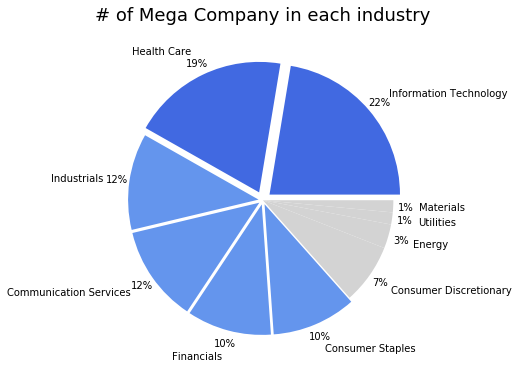

In [5]:
# drawing a pie chart
plt.pie(pie_input, colors=pie_colors, labels=pie_input.index, explode=explodes,  autopct='%1.0f%%', shadow=False,
        radius =1.5, pctdistance=1.1, labeldistance=1.2)
plt.title('# of Mega Company in each industry', loc='center', y=1.3, fontdict = 
              {'fontsize': 18, 'verticalalignment': 'baseline'})

plt.show()

In [6]:
# Bar Chart
bar_input = df_4[['Equity Summary Score']].groupby(['Equity Summary Score']).size()

bar_input.head()

Equity Summary Score
Bearish          4
Bullish         24
Neutral         30
Very Bearish     3
Very Bullish     6
dtype: int64

In [7]:
# reordering
new_index = ['Very Bearish', 'Bearish', 'Neutral', 'Bullish', 'Very Bullish']
bar_input = bar_input.reindex(new_index)

In [8]:
left = bar_input.index
print(left)

Index(['Very Bearish', 'Bearish', 'Neutral', 'Bullish', 'Very Bullish'], dtype='object', name='Equity Summary Score')


In [9]:
widths = (0.8, 0.8, 0.8, 0.8, 0.8)
colors = list()
for entry in bar_input:
    if entry >= 20:
        colors.append('deepskyblue')
    else:
        colors.append('gray')

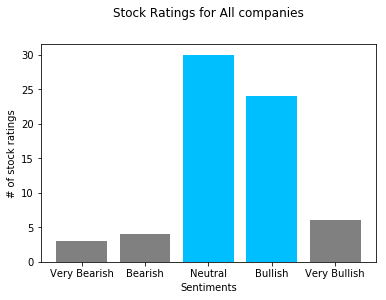

In [10]:
plt.bar(left, bar_input, width=widths, color=colors, align='center')
plt.title('Stock Ratings for All companies', loc='center', y=1.1)
plt.xlabel('Sentiments')
plt.ylabel('# of stock ratings')
plt.show()

In [11]:
plot_input = df_1[['Market Capitalization']]

plot_input.head()

,Market Capitalization
0,858.19
1,830.98
2,830.22
3,813.24
4,808.26


Text(0, 0.5, 'Billions of dollar')

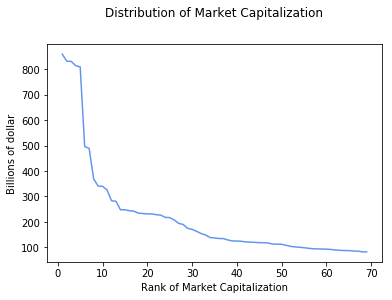

In [12]:
# since the capitalization is already in descending orders, I need to remove dollar sign and character B
plt.plot(range(1, 70), plot_input, color='cornflowerblue')
plt.title('Distribution of Market Capitalization', loc='center', y=1.1)
plt.xlabel('Rank of Market Capitalization')
plt.ylabel('Billions of dollar')


In [13]:
hist_input = df_1[['Dividend Yield']].fillna(0)

hist_input.head()

,Dividend Yield
0,1.64727
1,0.00000
2,1.66353
3,0.00000
4,0.00000


In [14]:
# grouping dividend yield into [0, 0.01-0.50...]
hist_input2 = hist_input.groupby(pd.cut(hist_input['Dividend Yield'], np.arange(0, 7.01, 0.5))).count()
print(hist_input2)

                Dividend Yield
Dividend Yield                
(0.0, 0.5]                   3
(0.5, 1.0]                   3
(1.0, 1.5]                   5
(1.5, 2.0]                   6
(2.0, 2.5]                  10
(2.5, 3.0]                  11
(3.0, 3.5]                   8
(3.5, 4.0]                   5
(4.0, 4.5]                   2
(4.5, 5.0]                   1
(5.0, 5.5]                   2
(5.5, 6.0]                   0
(6.0, 6.5]                   1
(6.5, 7.0]                   1


In [15]:
# Since np.arange does not include 0 in the index, I will add them manually
data = []

data.insert(0, {'Dividend Yield': 9})
hist_input3 = pd.concat([pd.DataFrame(data), hist_input2], ignore_index=False)
hist_input4 = hist_input3.reset_index()

print(hist_input4)

         index  Dividend Yield
0            0               9
1   (0.0, 0.5]               3
2   (0.5, 1.0]               3
3   (1.0, 1.5]               5
4   (1.5, 2.0]               6
5   (2.0, 2.5]              10
6   (2.5, 3.0]              11
7   (3.0, 3.5]               8
8   (3.5, 4.0]               5
9   (4.0, 4.5]               2
10  (4.5, 5.0]               1
11  (5.0, 5.5]               2
12  (5.5, 6.0]               0
13  (6.0, 6.5]               1
14  (6.5, 7.0]               1


<function matplotlib.pyplot.show(*args, **kw)>

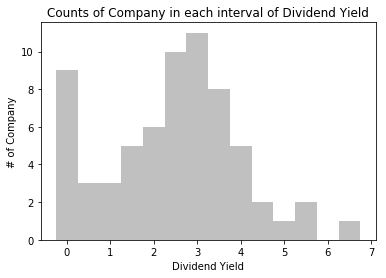

In [16]:
bins_number = np.arange(-0.25, 7.25, 0.5).astype(float)
x = np.arange(0.0, 7.1, 0.5).astype(float)
weight = [9,3,3,5,6,10,11,8,5,2,1,2,0,1,1]


# Insert minimum value at ndarray
plt.hist(x, bins=bins_number, weights=weight, color='silver');
plt.title('Counts of Company in each interval of Dividend Yield')
plt.ylabel('# of Company')
plt.xlabel('Dividend Yield')
plt.show

In [17]:
scat_input_x = df_3[['S&P Capital IQ Growth Stability']]
scat_input_y = df_3[['S&P Capital IQ Quality']]
filtering = df_1[['Sector']]
filtering_criteria = [['Health Care'], ['Information Technology']]

# scat_input_x.head()
# scat_input_y.head()
filtering.head()
# values match

,Sector
0,Information Technology
1,Consumer Discretionary
2,Information Technology
3,Communication Services
4,Communication Services


In [18]:
scat_colors = list()

for each in filtering.values:
    if(each in filtering_criteria[0]):
        scat_colors.append('red')
    elif(each in filtering_criteria[1]):
        scat_colors.append('darkred')
    else:
        scat_colors.append('lightgray')


print(colors)

['gray', 'gray', 'deepskyblue', 'deepskyblue', 'gray']


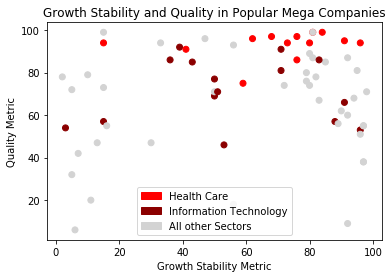

In [21]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Health Care')
dred_patch = mpatches.Patch(color='darkred', label='Information Technology')
gray_patch = mpatches.Patch(color='lightgray', label='All other Sectors')


plt.legend(handles=[red_patch, dred_patch, gray_patch])

plt.scatter(scat_input_x, scat_input_y,  marker='o', c=scat_colors)
plt.title('Growth Stability and Quality in Popular Mega Companies')
plt.xlabel('Growth Stability Metric')
plt.ylabel('Quality Metric')

plt.show()


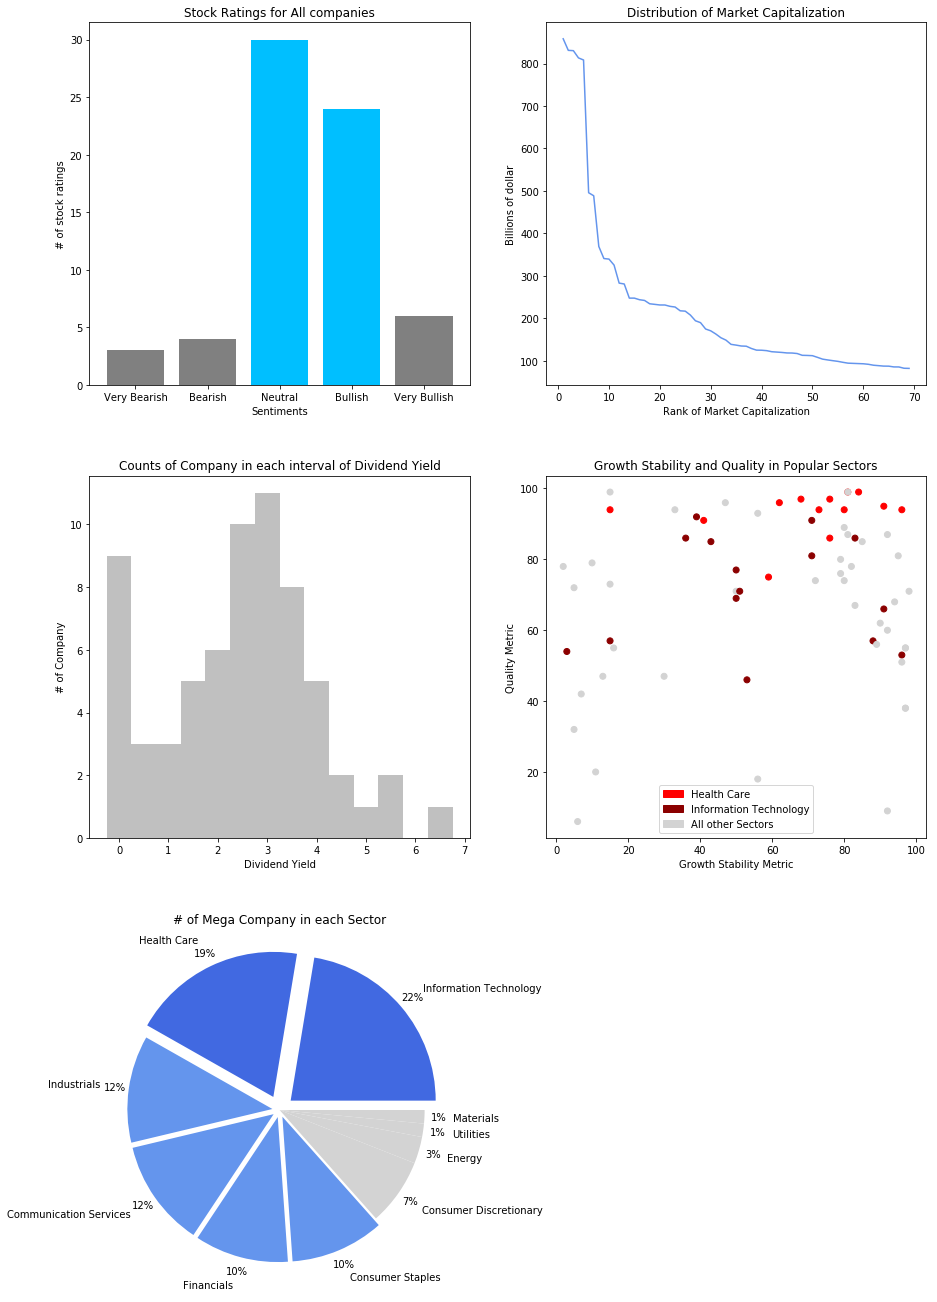

In [24]:
# creating figure and five subplots
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(3, 2, 1, xlabel='Sentiments', ylabel='# of stock ratings', 
                      title="Stock Ratings for All companies")
ax2 = fig.add_subplot(3, 2, 2, xlabel='Rank of Market Capitalization', ylabel='Billions of dollar', 
                      title='Distribution of Market Capitalization')
ax3 = fig.add_subplot(3, 2, 3, xlabel='Dividend Yield', ylabel='# of Company', 
                      title='Counts of Company in each interval of Dividend Yield')
ax4 = fig.add_subplot(3, 2, 4, xlabel='Growth Stability Metric', ylabel='Quality Metric', 
                      title='Growth Stability and Quality in Popular Sectors')
ax5 = fig.add_subplot(3, 2, 5, title='# of Mega Company in each industry')

plt.pie(pie_input, colors=pie_colors, labels=pie_input.index, explode=explodes,  autopct='%1.0f%%', shadow=False,
        radius =1, pctdistance=1.1, labeldistance=1.2)
plt.title('# of Mega Company in each Sector', loc='center')
ax1.bar(left, bar_input, width=widths, color=colors, align='center')
ax2.plot(range(1, 70), plot_input, color='cornflowerblue')
ax3.hist(x, bins=bins_number, weights=weight, color='silver');
ax4.scatter(scat_input_x, scat_input_y,  marker='o', c=scat_colors)
ax4.legend(handles=[red_patch, dred_patch,gray_patch])


# color='red', label='Health Care')
# dred_patch = mpatches.Patch(color='darkred', label='Information Technology'

plt.subplots_adjust(left=None, bottom=None, right=None, top=1.3, wspace=None, hspace=0.25)

